## Fraud Transaction Detection




In [1]:
!pip install lazypredict

In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
pip install -U imbalanced-learn

     ------------------------------------ 235.6/235.6 kB 400.4 kB/s eta 0:00:00
     ------------------------------------ 302.2/302.2 kB 425.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
data = pd.read_csv("C:/Users/Vaidhehi/creditcard.csv")
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
data.info()
print("\n\n\n")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [9]:
def class_amount_graph(class_num):
    
    fraudulent_data = data[data["Class"] == class_num]

 
    plt.hist(fraudulent_data["Amount"], bins=25, color='red')
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Amount for Class {class_num} (Fraudulent)")
    plt.show()

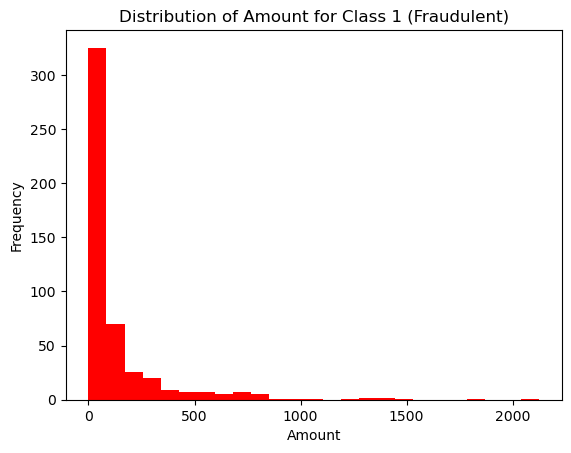

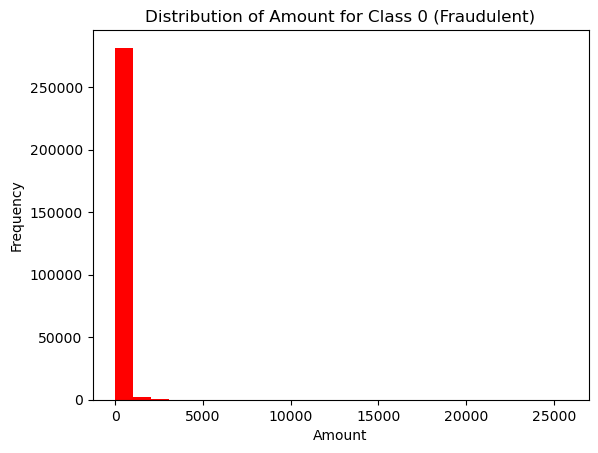

In [10]:
class_amount_graph(1)
print("\n\n\n")
class_amount_graph(0)

In [11]:
def top_10(class_num):
    
    top_amounts = data[data["Class"] == class_num]["Amount"].value_counts().head(10)

    
    plt.figure(figsize=(10, 6))
    top_amounts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Amounts for Class {class_num} Transactions')
    plt.xlabel('Amount')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

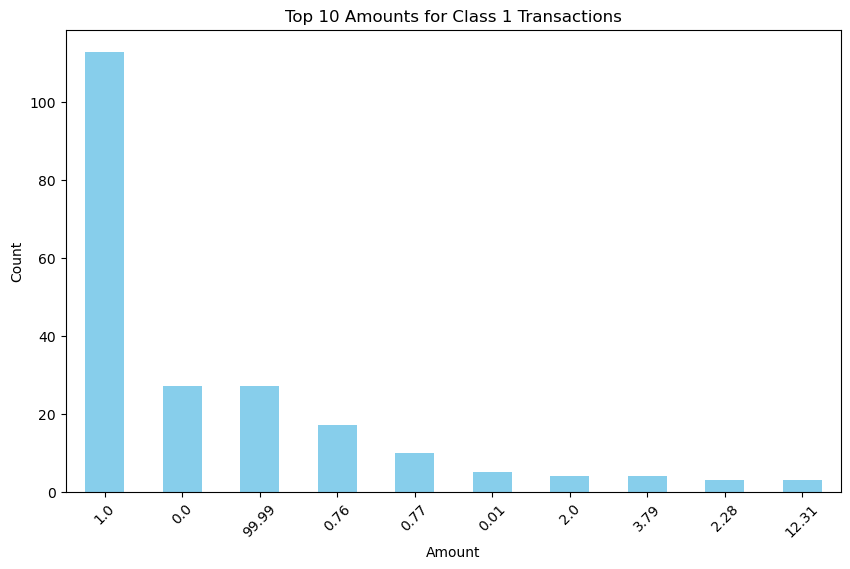

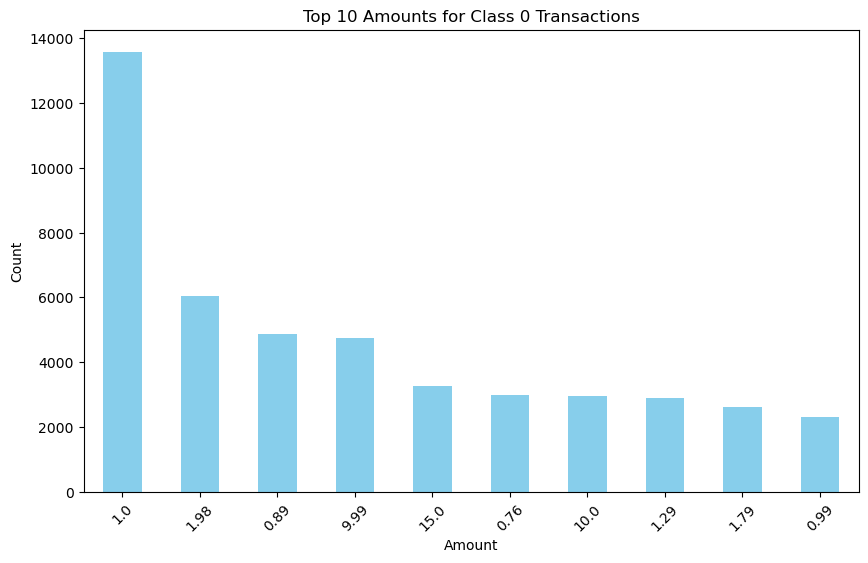

In [12]:
top_10(1)
print("\n\n\n")
top_10(0)

In [13]:
print(data.Class.value_counts())
print("\n")

print("The portion for not being fraud:", (data.Class.value_counts()[0] / len(data)) * 100, "\nThe portion for being fraud:", (data.Class.value_counts()[1] / len(data)) * 100)

0    284315
1       492
Name: Class, dtype: int64


The portion for not being fraud: 99.82725143693798 
The portion for being fraud: 0.1727485630620034


<function matplotlib.pyplot.show(close=None, block=None)>

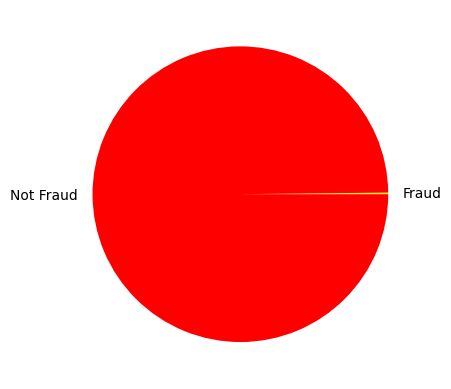

In [14]:
plt.pie([data[data["Class"] == 1].shape[0], data[data["Class"] == 0].shape[0]], labels=["Fraud", "Not Fraud"], colors=["yellow", "red"])
plt.show

In [15]:
X = data.drop("Class", axis=1)
y = data.Class
print(y.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

In [1]:
 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

NameError: name 'train_test_split' is not defined

In [6]:
from sklearn.ensemble import RandomForestClassifier
